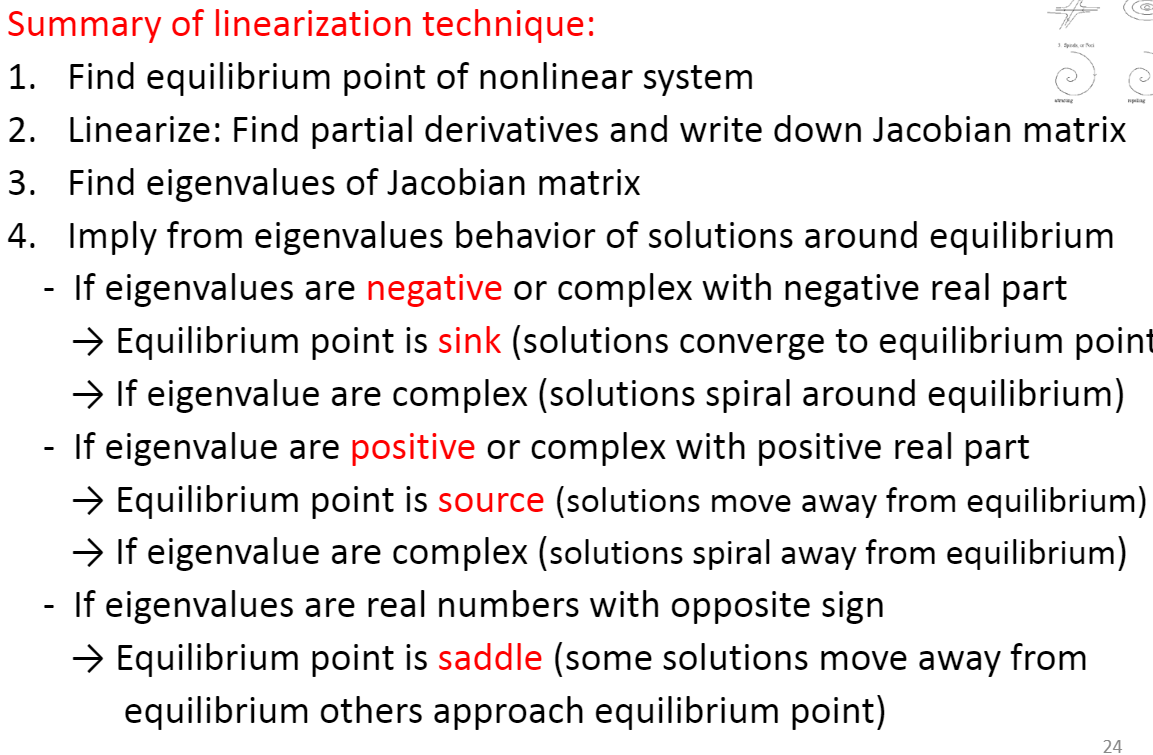

In [2]:
from IPython import display
display.Image(filename="C:/Users/diego/Downloads/Capture.png", retina=True)

In [3]:
#%% Import libraries
import numpy as np
from sympy import *
# from sympy.physics.mechanics import ReferenceFrame
from IPython.display import display, Latex, Math
init_printing(use_latex='mathjax')

from sys import path
path.append(
    "c:\\Users\\diego\\Dropbox\\Academic\\MEng Space Systems\\3. DOCA\\ADCS functions")
import ADCS_Functions as adcs
import ADCS_Functions_sym as adcs_sym

________________________________________________________

### Torque Free Motion (Axial Symmetric)

#### Prove that transversal angular velocity is constant

In [4]:
omega_1 = symbols('omega_01')*cos(symbols('\Omega')*symbols('t')) + symbols('omega_02')*sin(symbols('\Omega')*symbols('t'))
omega_2 = symbols('omega_02')*cos(symbols('\Omega')*symbols('t')) - symbols('omega_01')*sin(symbols('\Omega')*symbols('t'))

omega_1, omega_2


(ω₀₁⋅cos(\Omega⋅t) + ω₀₂⋅sin(\Omega⋅t), -ω₀₁⋅sin(\Omega⋅t) + ω₀₂⋅cos(\Omega⋅t)
)

In [5]:
omega_T = (omega_1**2 + omega_2**2)**0.5
omega_T.simplify()

             0.5
⎛   2      2⎞   
⎝ω₀₁  + ω₀₂ ⎠   

____________________________

## Kinetic Energy Ellipsoid - Torque Free Motion (Non-Symmetric)

#### Prove that kinetic energy is constant. In principal axis system. 

In [6]:
omega_1 = symbols('omega_1')
omega_2 = symbols('omega_2')
omega_3 = symbols('omega_3')
dotomega_1, dotomega_2, dotomega_3 = symbols('\dot{\omega_1} \dot{\omega_2} \dot{\omega_3}')
I1, I2, I3 = symbols('I_1 I_2 I_3')

T1 = I1*dotomega_1 + (I3-I2)*omega_2*omega_3
T2 = I2*dotomega_2 + (I1-I3)*omega_1*omega_3
T3 = I3*dotomega_3 + (I2-I1)*omega_2*omega_1

T1, T2, T3

(I₁⋅\dot{\omega_1} + ω₂⋅ω₃⋅(-I₂ + I₃), I₂⋅\dot{\omega_2} + ω₁⋅ω₃⋅(I₁ - I₃), I₃
⋅\dot{\omega_3} + ω₁⋅ω₂⋅(-I₁ + I₂))

In [7]:
# since T1, T2, T3 = 0

I1dotomega_1 = -(I3-I2)*omega_2*omega_3
I2dotomega_2 = -(I1-I3)*omega_1*omega_3
I3dotomega_3 = -(I2-I1)*omega_2*omega_1


In [8]:
dotT = I1*omega_1*dotomega_1 + I2*omega_2*dotomega_2 + I3*omega_3*dotomega_3
dotT.simplify()

I₁⋅\dot{\omega_1}⋅ω₁ + I₂⋅\dot{\omega_2}⋅ω₂ + I₃⋅\dot{\omega_3}⋅ω₃

In [9]:
dotT = I1dotomega_1*omega_1 + I2dotomega_2*omega_2 + I3dotomega_3*omega_3
dotT.simplify()

0

________________________

## Energy dissipation for axisymmetric body: Mathematical 

In [10]:
# Consider kinetic energy with axisymmetric body
omega_T = symbols('\omega_T')
I_T = symbols('I_T')

T = 1/2 * (I_T*omega_T**2 + I3*omega_3**2)
T


         2                   2
0.5⋅I₃⋅ω₃  + 0.5⋅I_T⋅\omega_T 

In [11]:
omega_T = Symbol('h')/I_T * sin(Symbol('\gamma'))
omega_3 = Symbol('h')/I3 * cos(Symbol('\gamma'))

In [12]:
T = 1/2 * (I_T*omega_T**2 + I3*omega_3**2)
T

     2    2                2    2        
0.5⋅h ⋅sin (\gamma)   0.5⋅h ⋅cos (\gamma)
─────────────────── + ───────────────────
        I_T                    I₃        

In [13]:
# Take time derivative of kinetic energy as dot\{T} = dT/d{gamma} * d{gamma}/dt
# Therefore, it is missing a * \dot{\gamma}

dotT = (diff(T, Symbol('\gamma')) * Symbol('\dot{\gamma}')).simplify()
dotT


                  2                         
0.5⋅\dot{\gamma}⋅h ⋅(I₃ - I_T)⋅sin(2⋅\gamma)
────────────────────────────────────────────
                   I₃⋅I_T                   

Using energy sink hypotheses $\dot{T}<0$

Implies sign $\frac{d \gamma}{dt}$ must correspond to sign of $(I_T - I_3)$

There are two cases:

Case 1: $(I_T - I_3) < 0$ --> $\frac{d \gamma}{dt} < 0$

In [31]:
# Case 1: (I_T - I_3) < 0 --> d{gamma}/dt < 0

# For minimum T: dotT = 0

gamma = solve(dotT, Symbol('\gamma'))
gamma[0], gamma[1]

(0.0, 1.5707963267949)

In [32]:
T.subs(Symbol('\gamma'), gamma[0]) # T @ gamma[0]


     2
0.5⋅h 
──────
  I₃  

In [35]:
T.subs(Symbol('\gamma'), gamma[1]) # T @ gamma[1] (ignore *10-33 term)

     2                         2
0.5⋅h    1.87469972832732e-33⋅h 
────── + ───────────────────────
 I_T                I₃          

Case 2: $(I_T - I_3) > 0$ --> $\frac{d \gamma}{dt} > 0$

In [ ]:
# Case 2: (I_T - I_3) > 0 --> d{gamma}/dt > 0

# For minimum T: dotT = 0

gamma = solve(dotT, Symbol('\gamma'))
gamma[0], gamma[1]
